<a href="https://colab.research.google.com/github/agrawalkunal2/RossmannSalesPrediction/blob/main/Final_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(20.0, 6.0))
import scipy.stats as stats

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Capstone 2/"
rossman_df = pd.read_csv(path+"Rossmann Stores Data.csv")
store_df = pd.read_csv(path+"store.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Looking at the data

In [ ]:
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
rossman_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


As observed above it contains the information pertaining to the store for the each day. The information contained is Store No, Day of the week, each date, sales on the given day, customers available on that day, whether the store was open on that day, if the store was participating on promo on that day and lastly whether on that day there was any state or school holiday.
<BR>
During look at tai we can observe that for few records there is 0 entry in sales

We have been given information in our problem set that few stores were closed pertaining to refurbishment. Also, we know that if the store is closed, there is no point of keeping it in our dataset.
<BR>
Let's check for closed stores

In [ ]:
len(rossman_df[rossman_df['Open']==0])

172817

In [ ]:
# checking if there was any sales made on stores if it was closed. If both are same we can delete those observations from oour dataset
len(rossman_df[(rossman_df['Open']==0) & (rossman_df['Sales']==0)])

172817

In [ ]:
# deleting the data having Store as closed
rossman_df = rossman_df[rossman_df['Open']==1]

In [ ]:
rossman_df.Open.value_counts()

1    844392
Name: Open, dtype: int64

As we can see that Open variable only contains single value. Thus we can delete this column

In [ ]:
# deleting Open
rossman_df.drop(labels='Open', axis=1,inplace=True)

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


As observed above, there are 1115 Rossmann stoes located and this data contains the geniric information about the store such as the type and assortment of the store, information pertaining to its competitors such as distance and the time from which the competition was open, whether the store us participating in any promo and the same is active from when and along with that the month cycle on which promo runs

In [ ]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  object
 7   SchoolHoliday  844392 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


As we can observe from above that there are no null values present in rossman_df ie the sales data. There are 6 numiric columns and 2 object columns

In [ ]:
rossman_df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,844392,NaN,NaN,NaN,558.423,321.732,1,280,558,837,1115
DayOfWeek,844392,NaN,NaN,NaN,3.52036,1.72369,1,2,3,5,7
Date,844392,942,2013-10-14,1115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,844392,NaN,NaN,NaN,6955.51,3104.21,0,4859,6369,8360,41551
Customers,844392,NaN,NaN,NaN,762.728,401.228,0,519,676,893,7388
Promo,844392,NaN,NaN,NaN,0.446352,0.497114,0,0,0,1,1
StateHoliday,844392,5,0,731342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SchoolHoliday,844392,NaN,NaN,NaN,0.19358,0.395103,0,0,0,0,1


Few observations that we can make looking at the data above is that "Sales" is our dependent variable.<BR>
By looking at median(50%) and the mean we can see that Store, DayOfWeek are close to have normal ditribution with small amount of right skewness, however, Sales and Customer are are more positively skewed. We will anyways verify it during EDA<BR>
At first glance, it can be said that Store,DayOfWeek,Open,Promo,StateHoliday and SchoolHoliday are the categorical variables <BR>
Also, Sales,Customers are the numerical variables

In [ ]:
# checking number of unique stores in the rossmann_df
rossman_df.Store.nunique()

1115

In [ ]:
# rossman_df.Store.value_counts().head(50).plot.bar()

Checking the number of entries of all the stores

In [ ]:
rossman_df.Store.value_counts()

85      942
1097    942
562     942
335     942
769     942
       ... 
909     607
100     606
744     605
348     597
644     592
Name: Store, Length: 1115, dtype: int64

It can be observed that stores have different number of entries.

In [ ]:
# finding unique counts
rossman_df.apply(lambda x: len(x.unique()))

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [ ]:
# shape of dataset
rossman_df.shape

(844392, 8)

Sanity Check of the data

In [ ]:
# Will Check sales is less than 0 for any day. We expect that it should not be there
rossman_df[rossman_df['Sales'] < 0]


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday


Now we will try to look at the other dataframe(store) and will try to figure out to join both dataframes

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_df.shape

(1115, 10)

As we can observe that, there are lot of null values in store dataframe, which we can asssume that it could be because the store is not participating in promos and there is no competition present in the vicinity of that store. However, we will try to check this out going forward.

In [ ]:
# we observed that all the stores which are not participating in promotional offer have 0 in there Promo2 coloumn
store_df[store_df["Promo2"]!=0].shape[0]

571

So, it is confirmed that all the columns **"Promo2SinceWeek","Promo2SinceYear","PromoInverval"** is null for those columns which don't participate in promotional offers. During EDA, we will try to treat it.

In [ ]:
# store_df[store_df["CompetitionDistance"]==np.nan]
np.where(pd.isnull(store_df['CompetitionDistance']))

(array([290, 621, 878]),)

There are 3 entries where Competition Distance is missing

Let's check if we can join rossman_df and sales_df by using Sales as common variable

In [ ]:
set(pd.DataFrame(rossman_df['Store'].value_counts()).index.to_list()) - set(pd.DataFrame(store_df['Store'].value_counts()).index.to_list())

set()

As we can see from the above that Store is present in the both dataframes and Store is acting as unique identifier for store_df dataframe. <BR>
So we will try to merge both dataframes and will work on single dataframe containing all the necessary information

In [ ]:
data = rossman_df.merge(store_df, on='Store',how='left')
print(rossman_df.shape)
print(data.shape)
#to cross check missing values present in our dataframe
print(data.isna().sum()) 

(844392, 8)
(844392, 17)
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
dtype: int64


In [ ]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


**EDA**
<BR>
Following are the steps we will take for EDA: <BR>
Removing duplicates<BR>
Missing value treatment<BR>
Outlier Treatment<BR>
Normalizing and Scaling( Numerical Variables)<BR>
Encoding Categorical variables( Dummy Variables)<BR>
Bivariate Analysis

In [ ]:
# finding out duplicate values in rossman_df
len(data[data.duplicated()])

0

So, our first assumption is matching, we don't have any duplicate data in our dataframe

Missing Value Treatment:<br>
We observed that for columns "Promo2SinceWeek", "Promo2SinceYear", "PromoInverval", it has null values as these stores don't take part in promotional activities. We will impute 0 in case of Promo2SinceWeek, Promo2SinceYear and PromoInterval. 

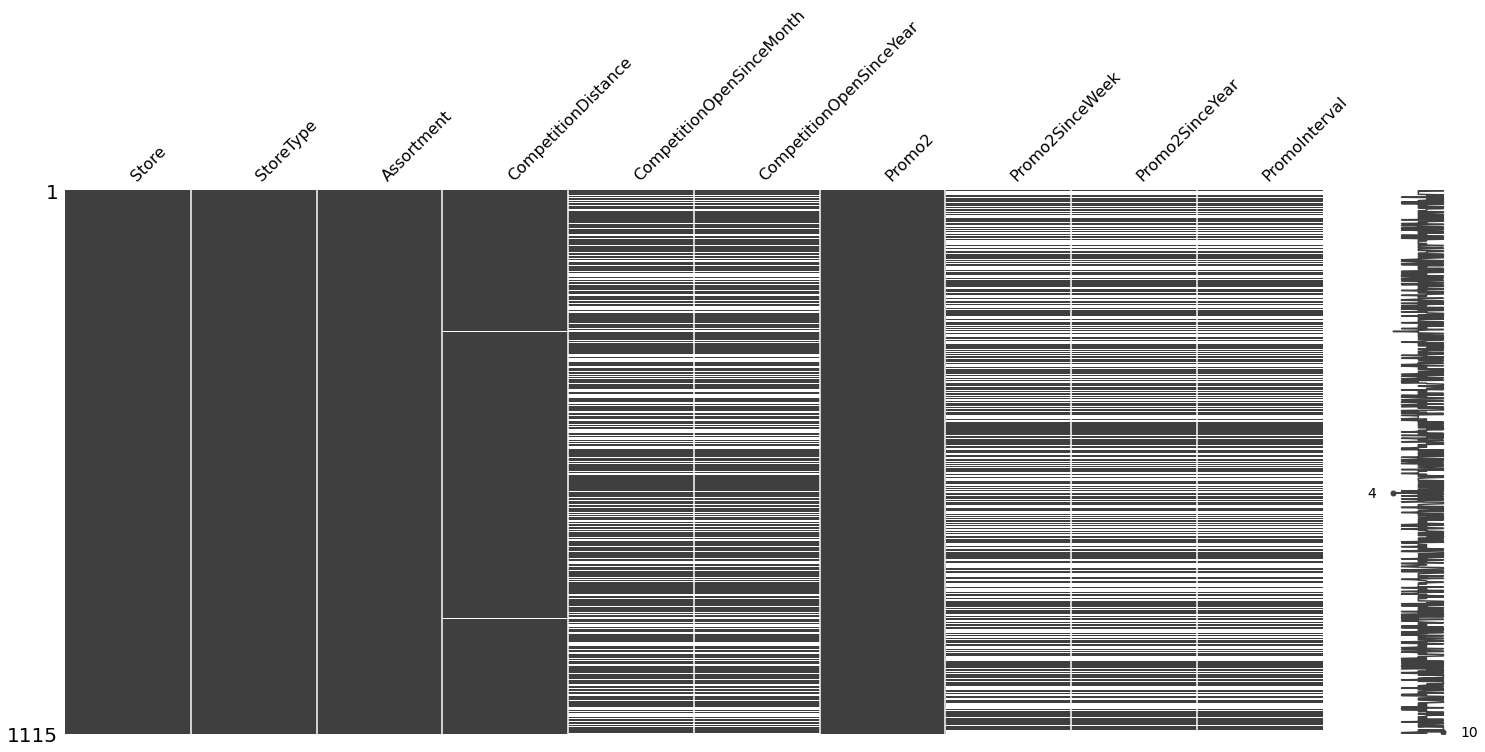

In [ ]:
# trying to identify pattern in null values in store_df
import missingno as msno
msno.matrix(store_df)

Few information that we can gather over here:


*   For Promo2SinceWeek, Promo2SinceYear and PromoInterval we can observe the pattern, it has the same rows where null value is present, hence, we can say that it is null only for those observations where stores don't take part in promos
*   For Competition distance there are 3 null values for which we are unable to observe any pattern
* For CompetitionOpenSinceMonth and CompetitionOpenSinceYear there is clear pattern and have null values for the same observations



We will be confirming this information:<BR>
Checking for promo

In [ ]:
  len(data[(data['Promo2'] == 1) & (data['Promo2SinceWeek'].isna())])

0

In [ ]:
len(data[(data['Promo2'] == 1) & (data['Promo2SinceYear'].isna())])

0

In [ ]:
len(data[(data['Promo2'] == 1) & (data['PromoInterval'].isna()) ])

0

In [ ]:
data['Promo2SinceYear'].mode()

0    2011.0
dtype: float64

In [ ]:
data['Promo2SinceYear'].mode().iloc[0]

2011.0

In [ ]:
# Missing value: promo Case

data['Promo2SinceWeek']= data['Promo2SinceWeek'].fillna(0)
data['Promo2SinceYear']= data['Promo2SinceYear'].fillna(0)
data['PromoInterval']= data['PromoInterval'].fillna(0)

Now will work on the missing values present in the columns related with compitition.

In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Above, we can observe that there are 3 values where the compitition distance is null values. To treat these entries we can either remove these entries from our data frame or we can impute these entries with the maximum distance in the Competition Distance column.
<BR>
Along with that as observed above there were many missing values in columns (CompetitionOpenSinceMonth and CompetitionOpenSinceYear). We will impute these missing values with the mode of those particular columns

In [ ]:
# imputing missing values pertaining to Competition related columns
data['CompetitionDistance']=data['CompetitionDistance'].fillna(data['CompetitionDistance'].max())
data['CompetitionOpenSinceMonth']= data['CompetitionOpenSinceMonth'].fillna(data['CompetitionOpenSinceMonth'].mode().iloc[0])
data['CompetitionOpenSinceYear']= data['CompetitionOpenSinceYear'].fillna(data['CompetitionOpenSinceYear'].mode().iloc[0])
# checking if there is any missing data present in our data frame
data.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

So there are no null values present now in our dataframe.
<BR>
Now, coming to the next assumption, we will do the Outlier Treatment

In [ ]:
# find Quartile ranges
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR) 
upper_range= Q3+(1.5 * IQR)
print(IQR,lower_range, upper_range)

Store                         557.0
DayOfWeek                       3.0
Sales                        3501.0
Customers                     374.0
Promo                           1.0
SchoolHoliday                   0.0
CompetitionDistance          6200.0
CompetitionOpenSinceMonth       3.0
CompetitionOpenSinceYear        5.0
Promo2                          1.0
Promo2SinceWeek                22.0
Promo2SinceYear              2012.0
dtype: float64 Store                        -555.5
DayOfWeek                      -2.5
Sales                        -392.5
Customers                     -42.0
Promo                          -1.5
SchoolHoliday                   0.0
CompetitionDistance         -8590.0
CompetitionOpenSinceMonth       1.5
CompetitionOpenSinceYear     2000.5
Promo2                         -1.5
Promo2SinceWeek               -33.0
Promo2SinceYear             -3018.0
dtype: float64 Store                         1672.5
DayOfWeek                        9.5
Sales                        136

We will plot the boxplot to identify the presence of outliers accross various independent variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


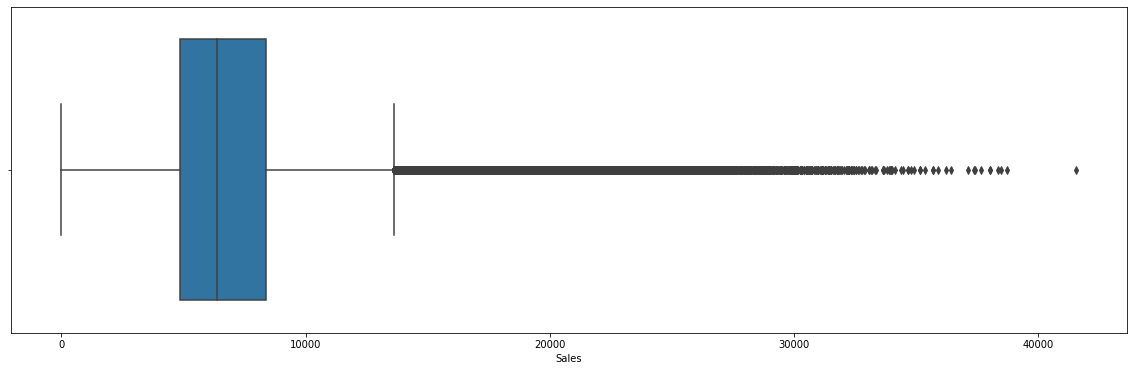

In [ ]:
# Sales
sns.boxplot(data['Sales'])

Here, we can observe that there are lot of outliers on Sales data. One resason we could think off is that it could be because for certain stores, there is very high sales. One of the most important assumption of Linear Regression algorithm is that there should be no outliers. <BR>
Hence, we will try to remove these outliers by adjusting these outliers. 
<BR>
Since, the data is right skewed, hence, we will adjust thse data by using Isolation Forest Algorithm available within sklearn.esamble

In [ ]:
df1 =data.copy

In [ ]:
# importing IsolationForest from sklearn.ensemble
from sklearn.ensemble import IsolationForest

In [ ]:
# adding two new columns 'anomaly_score_univariate_sales' and 'outlier_univariate_sales' for Sales
isolation_forest = IsolationForest(n_estimators=100, contamination=0.005)
isolation_forest.fit(data['Sales'].values.reshape(-1, 1))
data['anomaly_score_univariate_sales'] = isolation_forest.decision_function(data['Sales'].values.reshape(-1, 1))
data['outlier_univariate_sales'] = isolation_forest.predict(data['Sales'].values.reshape(-1, 1))

In [ ]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,anomaly_score_univariate_sales,outlier_univariate_sales
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0.308925,1
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0.319927,1
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0.292861,1
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,0.129100,1
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,0.308903,1


In [ ]:
# Total outliers detected
len(data[data['outlier_univariate_sales']==-1])

4198

In [ ]:
data.shape

(844392, 19)

In [ ]:
data = data[data['outlier_univariate_sales'] == 1]

In [ ]:
data.drop(labels=['anomaly_score_univariate_sales','outlier_univariate_sales'],axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


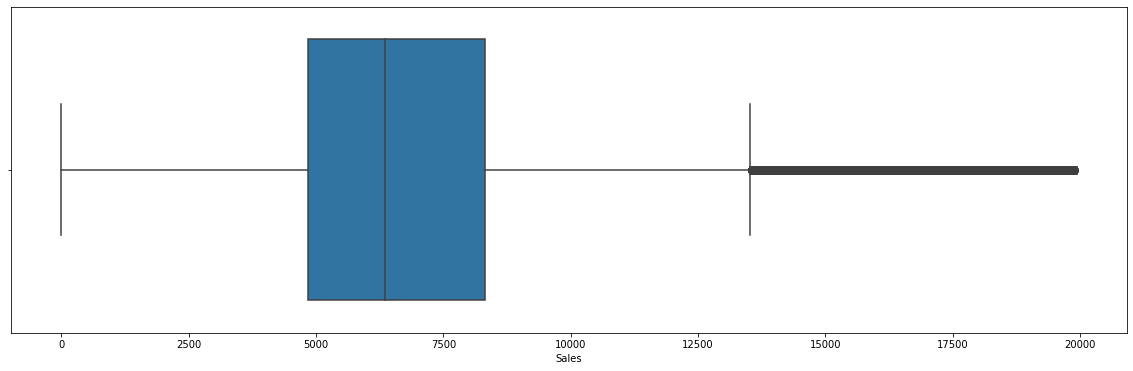

In [ ]:
# again plotting sales boxplot
sns.boxplot(data['Sales'])

In [ ]:
# data['Sales']=np.where(data['Sales']> 13611.5,13611.5,data['Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


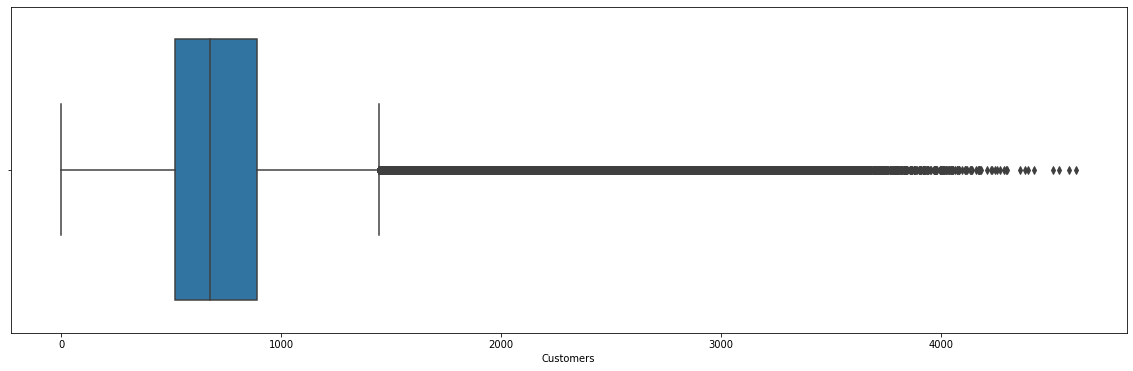

In [ ]:
# Customers
sns.boxplot(data['Customers'])

Again we can observe that, again the data is right skewed. Hence we will adjust these outlies as per the higher range of the customers

In [ ]:
# Adjusting customer outliers
data['Customers']=np.where(data['Customers']> 1454.0,1454.0,data['Customers'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


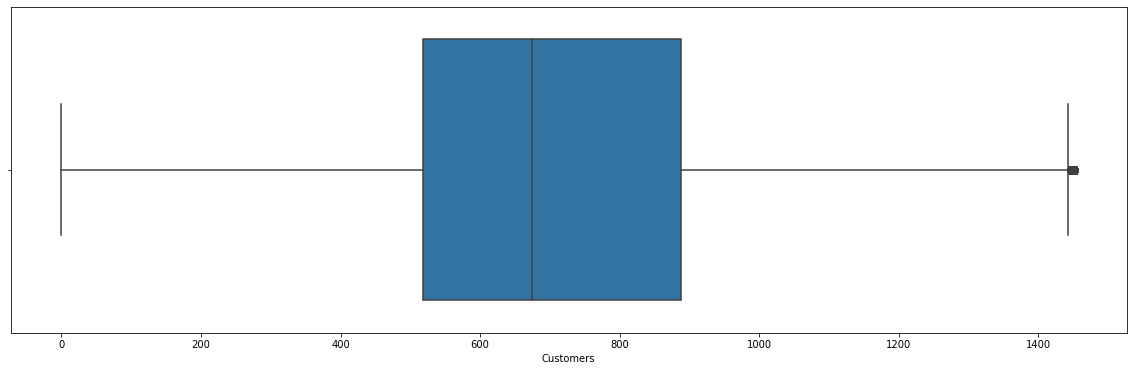

In [ ]:
# Again plotting boxplot: Customers
sns.boxplot(data['Customers'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


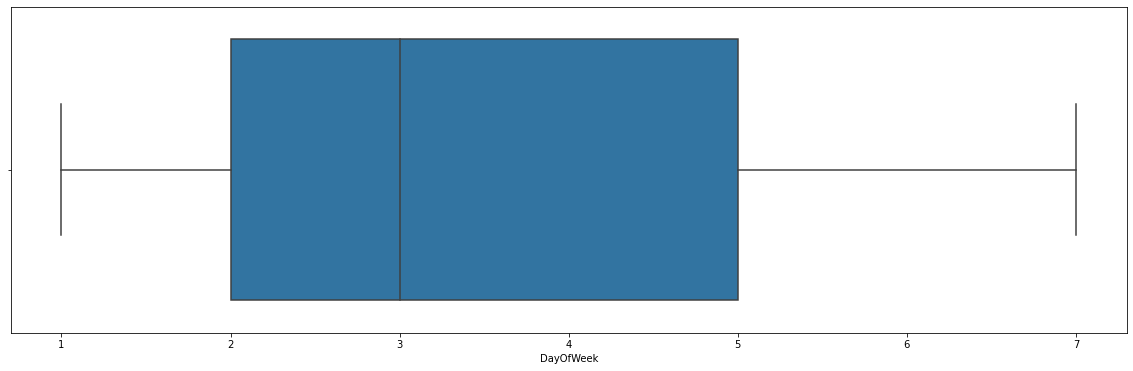

In [ ]:
sns.boxplot(data["DayOfWeek"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840194 entries, 0 to 844391
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      840194 non-null  int64  
 1   DayOfWeek                  840194 non-null  int64  
 2   Date                       840194 non-null  object 
 3   Sales                      840194 non-null  int64  
 4   Customers                  840194 non-null  float64
 5   Promo                      840194 non-null  int64  
 6   StateHoliday               840194 non-null  object 
 7   SchoolHoliday              840194 non-null  int64  
 8   StoreType                  840194 non-null  object 
 9   Assortment                 840194 non-null  object 
 10  CompetitionDistance        840194 non-null  float64
 11  CompetitionOpenSinceMonth  840194 non-null  float64
 12  CompetitionOpenSinceYear   840194 non-null  float64
 13  Promo2                     84

In [ ]:
# date column converting to date type
data["Date"]  = pd.to_datetime(data["Date"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#date column
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data['WeekOfYear'] = data.Date.dt.isocalendar().week
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear
0,1,5,2015-07-31,5263,555.0,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,31,7,2015,31
1,2,5,2015-07-31,6064,625.0,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015,31
2,3,5,2015-07-31,8314,821.0,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015,31
3,4,5,2015-07-31,13995,1454.0,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,31,7,2015,31
4,5,5,2015-07-31,4822,559.0,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,31,7,2015,31


In [ ]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear
0,1,5,2015-07-31,5263,555.0,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,31,7,2015,31
1,2,5,2015-07-31,6064,625.0,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015,31
2,3,5,2015-07-31,8314,821.0,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015,31
3,4,5,2015-07-31,13995,1454.0,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,31,7,2015,31
4,5,5,2015-07-31,4822,559.0,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,31,7,2015,31


Now finding since how many months competition is open and along with that we will also try to find out for how many months Promotion is running

In [ ]:
def comp_month(df):
  df['TotalCompetitionMonth'] = 12 * (df.year - df.CompetitionOpenSinceYear) + (df.month - df.CompetitionOpenSinceMonth)

In [ ]:
comp_month(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We can do same thing for Promos

In [ ]:
def promo_week(df):
  df['TotalPromoWeek'] = 52 * (df.year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek )

In [ ]:
promo_week(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear,TotalCompetitionMonth,TotalPromoWeek
0,1,5,2015-07-31,5263,555.0,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,31,7,2015,31,82.0,104811.0
1,2,5,2015-07-31,6064,625.0,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015,31,92.0,278.0
2,3,5,2015-07-31,8314,821.0,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015,31,103.0,225.0
3,4,5,2015-07-31,13995,1454.0,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,31,7,2015,31,70.0,104811.0
4,5,5,2015-07-31,4822,559.0,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,31,7,2015,31,3.0,104811.0


In [ ]:
data[data["TotalCompetitionMonth"]<0]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear,TotalCompetitionMonth,TotalPromoWeek
686,688,5,2015-07-31,5107,469.0,1,0,1,a,a,18760.0,8.0,2015.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015,31,-1.0,225.0
1017,1020,5,2015-07-31,10734,1138.0,1,0,1,a,a,40.0,8.0,2015.0,0,0.0,0.0,0,31,7,2015,31,-1.0,104811.0
1069,1072,5,2015-07-31,10270,817.0,1,0,1,a,c,5380.0,8.0,2015.0,1,5.0,2010.0,"Feb,May,Aug,Nov",31,7,2015,31,-1.0,286.0
1799,688,4,2015-07-30,4188,416.0,1,0,1,a,a,18760.0,8.0,2015.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",30,7,2015,31,-1.0,225.0
2130,1020,4,2015-07-30,8020,943.0,1,0,1,a,a,40.0,8.0,2015.0,0,0.0,0.0,0,30,7,2015,31,-1.0,104811.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844383,512,2,2013-01-01,2646,625.0,0,a,1,b,b,590.0,9.0,2013.0,1,5.0,2013.0,"Mar,Jun,Sept,Dec",1,1,2013,1,-8.0,-4.0
844384,530,2,2013-01-01,2907,532.0,0,a,1,a,c,18160.0,9.0,2013.0,0,0.0,0.0,0,1,1,2013,1,-8.0,104677.0
844385,562,2,2013-01-01,8498,1454.0,0,a,1,b,c,1210.0,9.0,2013.0,0,0.0,0.0,0,1,1,2013,1,-8.0,104677.0
844389,769,2,2013-01-01,5035,1248.0,0,a,1,b,b,840.0,9.0,2013.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",1,1,2013,1,-8.0,5.0


We can observe that few entries of Total Competition Month and Total Competition Week is less than zero. Reson being for that particular day, competition won't be there. <BR>
We will make those columns as zero.

In [ ]:
data['TotalCompetitionMonth'] = data['TotalCompetitionMonth'].apply(lambda x : 0 if x < 0 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# doing same for TotalPromoWeek
data['TotalPromoWeek'] = data['TotalPromoWeek'].apply(lambda x : 0 if x < 0 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now we can drop these columns: CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek and Promo2SinceYear

In [ ]:
data.drop(labels=["CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2SinceWeek","Promo2SinceYear"],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data.head()


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,day,month,year,WeekOfYear,TotalCompetitionMonth,TotalPromoWeek
0,1,5,2015-07-31,5263,555.0,1,0,1,c,a,1270.0,0,0,31,7,2015,31,82.0,104811.0
1,2,5,2015-07-31,6064,625.0,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",31,7,2015,31,92.0,278.0
2,3,5,2015-07-31,8314,821.0,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",31,7,2015,31,103.0,225.0
3,4,5,2015-07-31,13995,1454.0,1,0,1,c,c,620.0,0,0,31,7,2015,31,70.0,104811.0
4,5,5,2015-07-31,4822,559.0,1,0,1,a,a,29910.0,0,0,31,7,2015,31,3.0,104811.0


In [ ]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,day,month,year,WeekOfYear,TotalCompetitionMonth,TotalPromoWeek
count,840194.000000,840194.000000,840194.000000,840194.000000,840194.000000,840194.000000,840194.000000,840194.000000,840194.000000,840194.000000,840194.000000,840194.000000,840194.000000,840194.000000
mean,558.139468,3.523831,6875.947891,731.258359,0.444921,0.193439,5658.594836,0.500331,15.839157,5.840320,2013.832117,23.623629,44.549762,52393.779718
std,321.842822,1.721948,2892.723933,292.624390,0.496957,0.394994,8591.044708,0.500000,8.678117,3.321237,0.777321,14.377345,63.864105,52315.137114
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,2013.000000,1.000000,0.000000,0.000000
25%,280.000000,2.000000,4851.000000,518.000000,0.000000,0.000000,720.000000,0.000000,8.000000,3.000000,2013.000000,11.000000,5.000000,108.000000
50%,558.000000,3.000000,6352.000000,674.000000,0.000000,0.000000,2340.000000,1.000000,16.000000,6.000000,2014.000000,23.000000,20.000000,306.000000
75%,838.000000,5.000000,8320.000000,888.000000,1.000000,0.000000,6920.000000,1.000000,23.000000,8.000000,2014.000000,35.000000,73.000000,104743.000000
max,1115.000000,7.000000,19924.000000,1454.000000,1.000000,1.000000,75860.000000,1.000000,31.000000,12.000000,2015.000000,52.000000,1386.000000,104811.000000


In [ ]:
# data[data["TotalPromoWeek"]<0]

**Univariate Analysis**

In [ ]:
dec = data.copy()

In [ ]:
data['Promo'].astype('category').value_counts() 

0    466374
1    373820
Name: Promo, dtype: int64

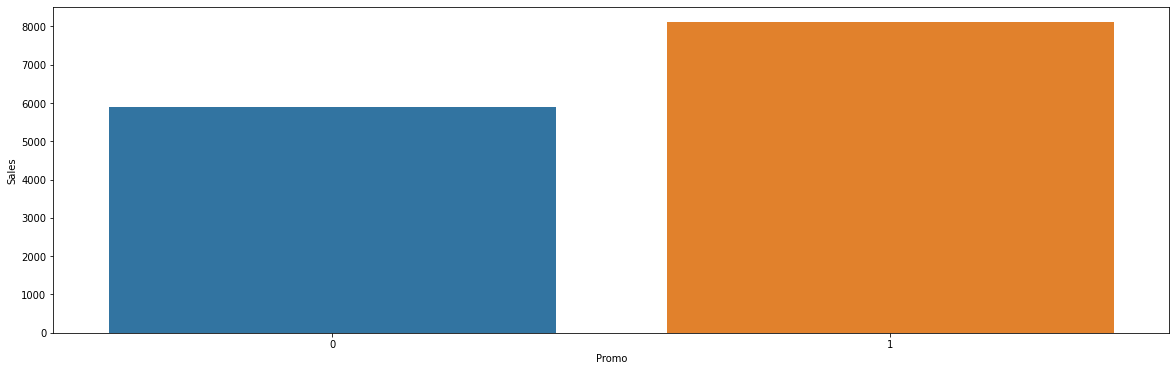

In [ ]:
#Average sales vs Promo
Avg_Promo_sales = pd.DataFrame(data.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Avg_Promo_sales.index, y = Avg_Promo_sales['Sales'])

Thus it can be concluded the Promo does drives the sales in positive way

In [ ]:
data['DayOfWeek'].astype('category').value_counts() # Most data is available for Saturday, as we know that on Sundays most of the stores are 
#closed, hence, very less data is available for it

6    143701
2    143267
3    141499
5    138117
1    135942
4    134246
7      3422
Name: DayOfWeek, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


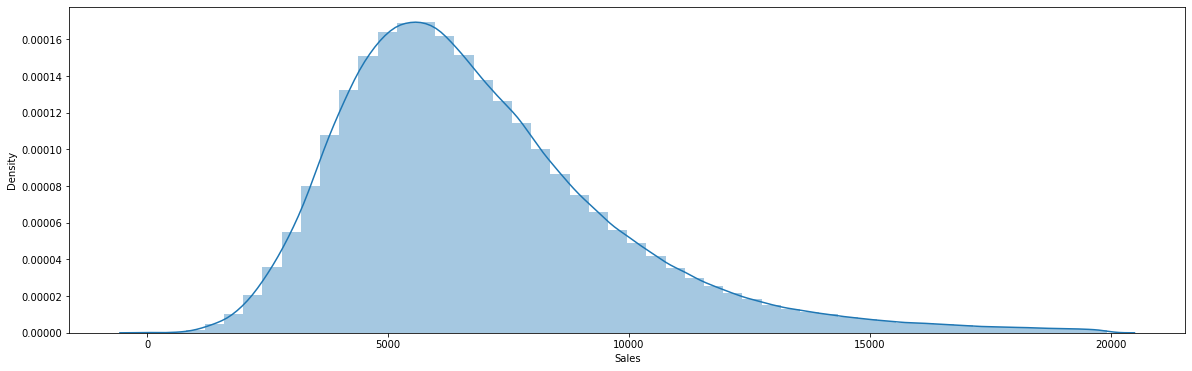

In [ ]:
sns.distplot(data['Sales'])
plt.show()

We can observe that there is bit of right skewness in the Sales data. We will try to do sqrt transformation on this data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


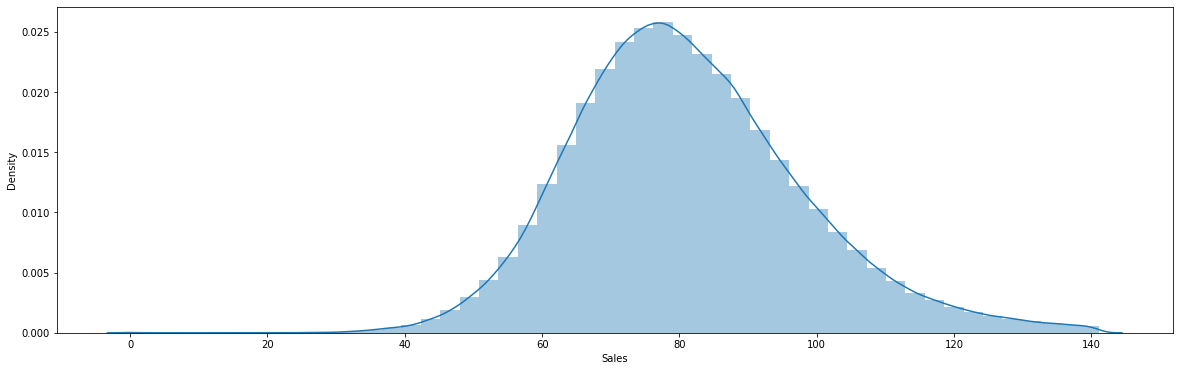

In [ ]:
sns.distplot(np.sqrt(data['Sales']))
plt.show()

((array([-4.79215801, -4.61112139, -4.51320823, ...,  4.51320823,
          4.61112139,  4.79215801]),
  array([  0.        ,   0.        ,   0.        , ..., 141.14531519,
         141.14885759, 141.15239991])),
 (16.684699104928008, 81.20189331198078, 0.9932004353080234))

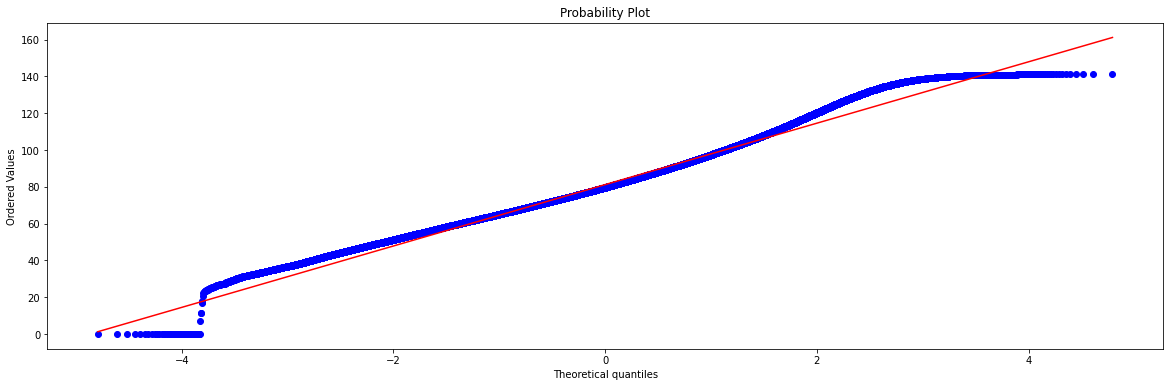

In [ ]:
# drawing QQ plot to verify the normality
stats.probplot(np.sqrt(data['Sales']), dist="norm", plot=plt)

By looking at the above two graphs, we can conclude that by applying sqrt transformation Sales is close to normal distribution and we can go ahead with it

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


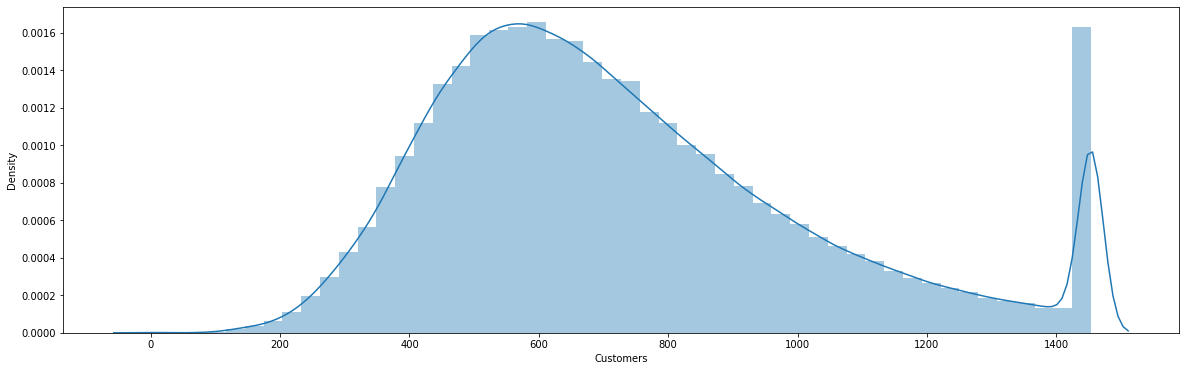

In [ ]:
sns.distplot(data['Customers'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


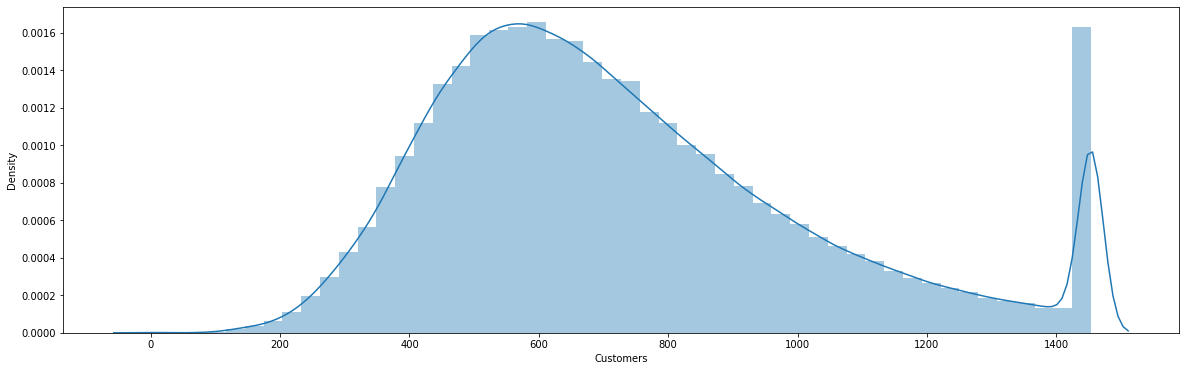

In [ ]:
sns.distplot(data['Customers'])
plt.show()

In [ ]:
data['StateHoliday'].astype('category').value_counts() 

0    727549
0    111772
a       671
b       135
c        67
Name: StateHoliday, dtype: int64

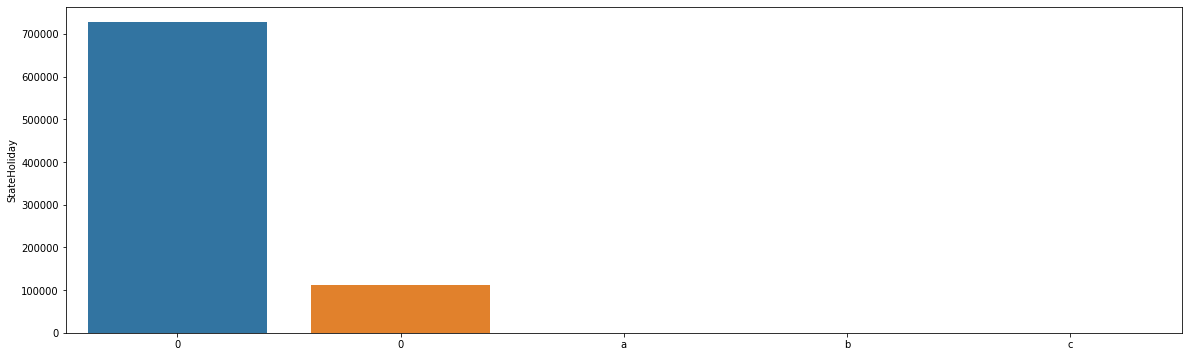

In [ ]:
sns.barplot(x=data.StateHoliday.value_counts().index, y=data.StateHoliday.value_counts())

Here, we can observe that there is 2 times 0, hence during one-hot encoding we will try to fix it by making it a single zero

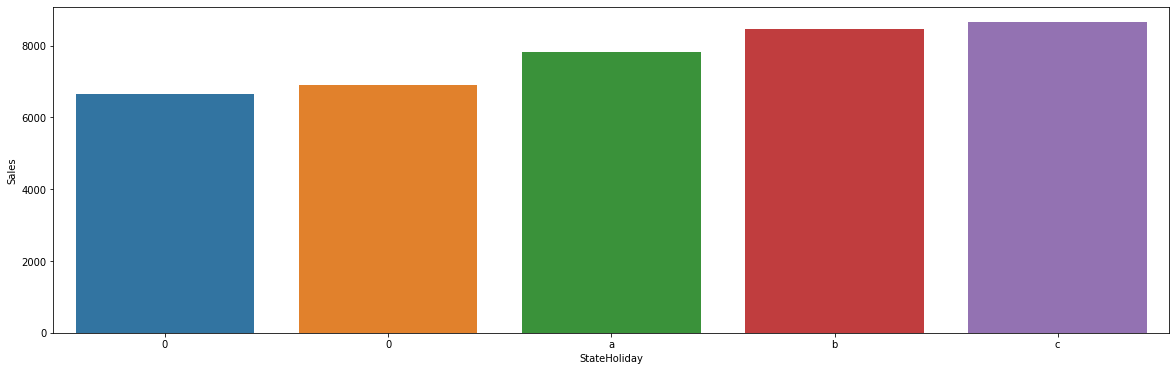

In [ ]:
Avg_StateHoliday_sales = pd.DataFrame(data.groupby('StateHoliday').agg({'Sales':'mean'}))
sns.barplot(x=Avg_StateHoliday_sales.index, y = Avg_StateHoliday_sales['Sales'])

In [ ]:
data['SchoolHoliday'].astype('category').value_counts() 

0    677668
1    162526
Name: SchoolHoliday, dtype: int64

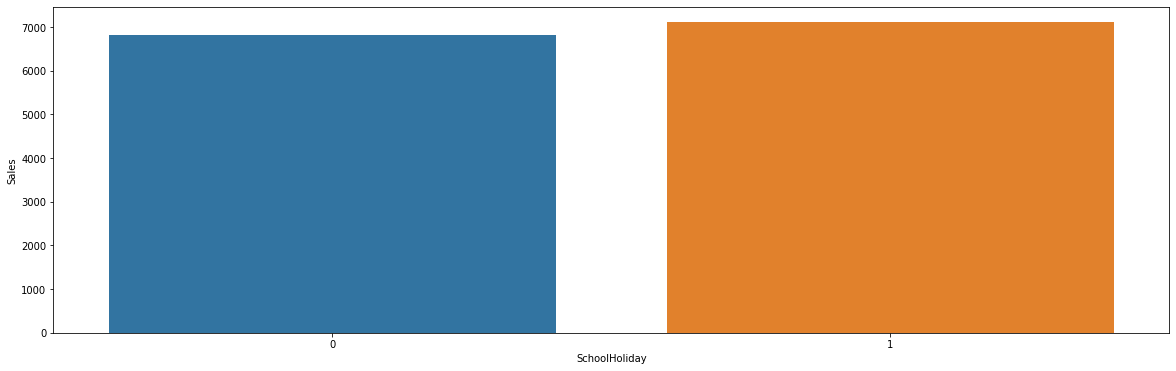

In [ ]:
Avg_SchoolHoliday_sales = pd.DataFrame(data.groupby('SchoolHoliday').agg({'Sales':'mean'}))
sns.barplot(x=Avg_SchoolHoliday_sales.index, y = Avg_SchoolHoliday_sales['Sales'])

Thus school holiday doesn't have much effect on Sales mean

In [ ]:
data['StoreType'].astype('category').value_counts() 

a    454308
d    258404
c    112668
b     14814
Name: StoreType, dtype: int64

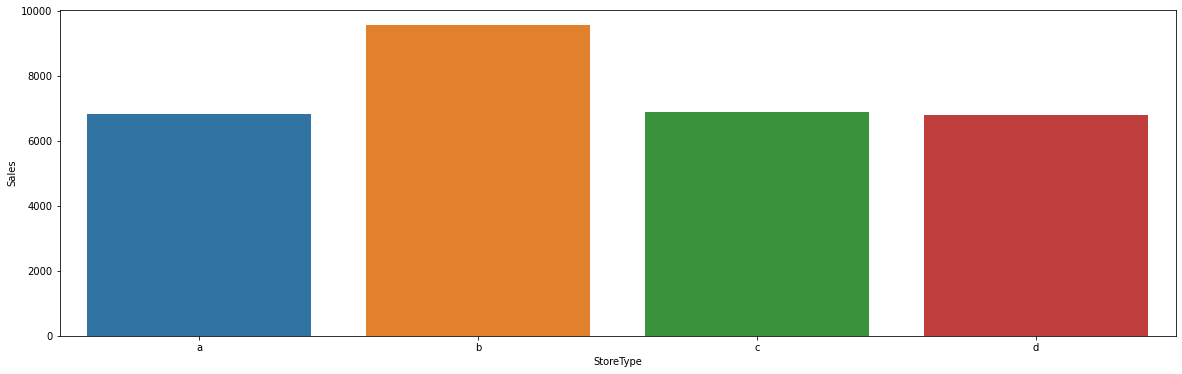

In [ ]:
# StoreType vs avg Sales
Avg_StoreType_sales = pd.DataFrame(data.groupby('StoreType').agg({'Sales':'mean'}))
sns.barplot(x=Avg_StoreType_sales.index, y = Avg_StoreType_sales['Sales'])

Store type b has more sales in comparision to other store types

In [ ]:
data['Assortment'].astype('category').value_counts() # Most number of stores have assortment with Basic and extended levels 

a    443143
c    388850
b      8201
Name: Assortment, dtype: int64

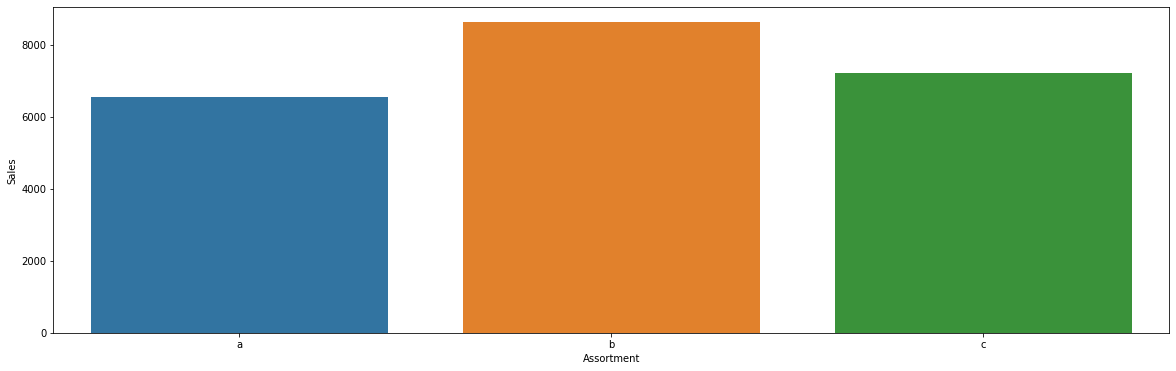

In [ ]:
# Assortment vs Avg Sales
Avg_Assortment_sales = pd.DataFrame(data.groupby('Assortment').agg({'Sales':'mean'}))
sns.barplot(x=Avg_Assortment_sales.index, y = Avg_Assortment_sales['Sales'])

Assortment type 'b' (Extra) has more average sales in comparision to other Assortment types

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


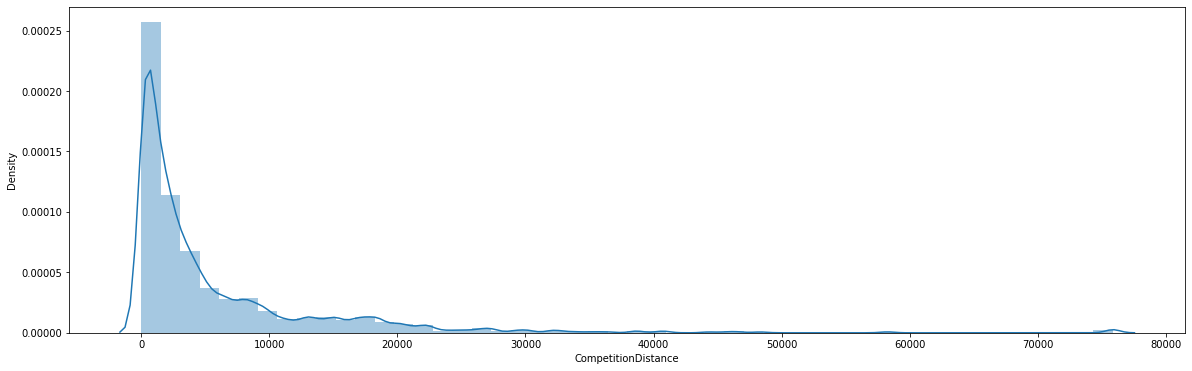

In [ ]:
sns.distplot(data['CompetitionDistance'])
plt.show()

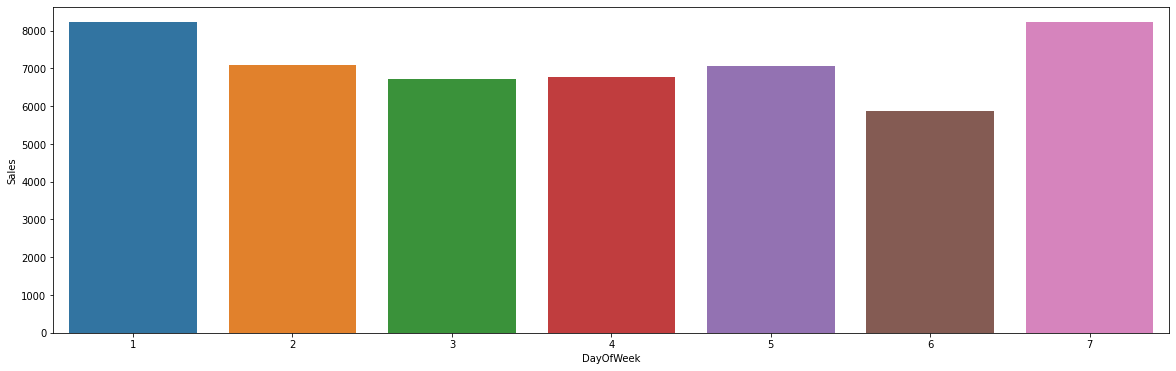

In [ ]:
# How Sales differ in each day of week
Avg_week_sales = pd.DataFrame(rossman_df.groupby('DayOfWeek').agg({'Sales':'mean'}))
sns.barplot(x=Avg_week_sales.index, y = Avg_week_sales['Sales'])

Form above plot we can conclude that mean sales is high on Mondays and Sundays, despite the fact that most stores are closed on Sundays.<BR>
Management can look into opening stores on weekends

**Data Exploration**
<BR>
To perform linear regression, the target variable should be linearly related to independent variables. Let's see whether that's true in this case.

In [ ]:
#checking numerical columns by creating numeric df
numeric_df = data.select_dtypes(include=['float64','int64'])
numeric_df.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,day,month,year,TotalCompetitionMonth,TotalPromoWeek
0,1,5,5263,555.0,1,1,1270.0,0,31,7,2015,82.0,104811.0
1,2,5,6064,625.0,1,1,570.0,1,31,7,2015,92.0,278.0
2,3,5,8314,821.0,1,1,14130.0,1,31,7,2015,103.0,225.0
3,4,5,13995,1454.0,1,1,620.0,0,31,7,2015,70.0,104811.0
4,5,5,4822,559.0,1,1,29910.0,0,31,7,2015,3.0,104811.0


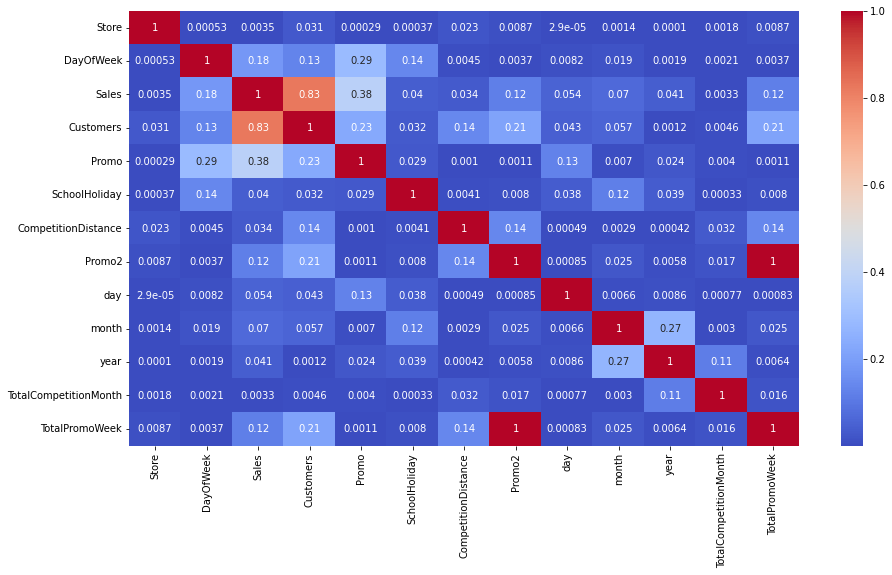

In [ ]:
#Correlation matrix
corr=numeric_df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(abs(corr),annot=True,cmap="coolwarm")

In [ ]:
# numeric_cols

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Store', 'Sales', 'Promo', 'SchoolHoliday', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'day', 'month', 'year', 'WeekOfYear']]])


,variables,VIF
0,DayOfWeek,3.213372
1,Customers,3.791261
2,CompetitionDistance,1.404141
3,TotalCompetitionMonth,1.431074
4,TotalPromoWeek,2.163516


In [ ]:
numerical_features = ['DayOfWeek','Customers','CompetitionDistance','TotalCompetitionMonth','TotalPromoWeek']

In [ ]:
# Mean Encoding
# Here we are trying to group day of the week through mean sales
DayOfWeek_me = data.groupby("DayOfWeek")["Sales"].mean()
def mean_encoding(dataset) :
    
    op_set = (dataset.assign( DayOfWeek = dataset.DayOfWeek.replace(DayOfWeek_me.index, DayOfWeek_me.values) ))
    return op_set

In [ ]:
data = mean_encoding(data)
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,day,month,year,WeekOfYear,TotalCompetitionMonth,TotalPromoWeek
0,1,7014.14668,2015-07-31,5263,555.0,1,0,1,c,a,1270.0,0,0,31,7,2015,31,82.0,104811.0
1,2,7014.14668,2015-07-31,6064,625.0,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",31,7,2015,31,92.0,278.0
2,3,7014.14668,2015-07-31,8314,821.0,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",31,7,2015,31,103.0,225.0
3,4,7014.14668,2015-07-31,13995,1454.0,1,0,1,c,c,620.0,0,0,31,7,2015,31,70.0,104811.0
4,5,7014.14668,2015-07-31,4822,559.0,1,0,1,a,a,29910.0,0,0,31,7,2015,31,3.0,104811.0


In [ ]:
data.DayOfWeek.value_counts()

5833.820975    143701
7013.000112    143267
6679.563538    141499
7014.146680    138117
8040.970127    135942
6719.736193    134246
7289.609293      3422
Name: DayOfWeek, dtype: int64

**Feature engineering**

In [ ]:
# One hot encoding
data = pd.get_dummies(data, columns=['StoreType','PromoInterval', 'Assortment'], prefix=['StoreType','PromoInterval', 'Assortment'])

In [ ]:
data.StateHoliday.value_counts()

0    727549
0    111772
a       671
b       135
c        67
Name: StateHoliday, dtype: int64

In [ ]:
# we observed that there were 2 entries for 0 in state holidays and along with that very less entries for a,b,c, 
# hence, we will club all of them
def num_state_holidays(holiday):
  if (holiday == 'a') | (holiday == 'b') | (holiday == 'c'):
    return 1
  else:
    return 0

In [ ]:
data['StateHoliday']= data['StateHoliday'].apply(lambda x: num_state_holidays(x))

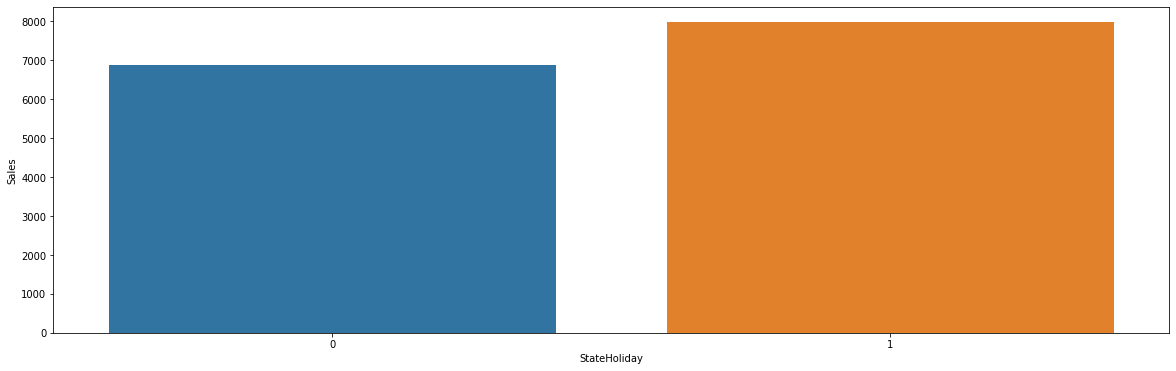

In [ ]:
# State Holiday vs Avg. Sales
Avg_StateHoliday_sales = pd.DataFrame(data.groupby('StateHoliday').agg({'Sales':'mean'}))
sns.barplot(x=Avg_StateHoliday_sales.index, y = Avg_StateHoliday_sales['Sales'])

In [ ]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,day,month,year,WeekOfYear,TotalCompetitionMonth,TotalPromoWeek,StoreType_a,StoreType_b,StoreType_c,StoreType_d,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Assortment_a,Assortment_b,Assortment_c
0,1,7014.14668,2015-07-31,5263,555.0,1,0,1,1270.0,0,31,7,2015,31,82.0,104811.0,0,0,1,0,1,0,0,0,1,0,0
1,2,7014.14668,2015-07-31,6064,625.0,1,0,1,570.0,1,31,7,2015,31,92.0,278.0,1,0,0,0,0,0,1,0,1,0,0
2,3,7014.14668,2015-07-31,8314,821.0,1,0,1,14130.0,1,31,7,2015,31,103.0,225.0,1,0,0,0,0,0,1,0,1,0,0
3,4,7014.14668,2015-07-31,13995,1454.0,1,0,1,620.0,0,31,7,2015,31,70.0,104811.0,0,0,1,0,1,0,0,0,0,0,1
4,5,7014.14668,2015-07-31,4822,559.0,1,0,1,29910.0,0,31,7,2015,31,3.0,104811.0,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
# dropping columns
# data.drop(labels=["Date","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2SinceWeek","Promo2SinceYear"],axis=1, inplace=True)

In [ ]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,day,month,year,WeekOfYear,TotalCompetitionMonth,TotalPromoWeek,StoreType_a,StoreType_b,StoreType_c,StoreType_d,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Assortment_a,Assortment_b,Assortment_c
0,1,7014.14668,2015-07-31,5263,555.0,1,0,1,1270.0,0,31,7,2015,31,82.0,104811.0,0,0,1,0,1,0,0,0,1,0,0
1,2,7014.14668,2015-07-31,6064,625.0,1,0,1,570.0,1,31,7,2015,31,92.0,278.0,1,0,0,0,0,0,1,0,1,0,0
2,3,7014.14668,2015-07-31,8314,821.0,1,0,1,14130.0,1,31,7,2015,31,103.0,225.0,1,0,0,0,0,0,1,0,1,0,0
3,4,7014.14668,2015-07-31,13995,1454.0,1,0,1,620.0,0,31,7,2015,31,70.0,104811.0,0,0,1,0,1,0,0,0,0,0,1
4,5,7014.14668,2015-07-31,4822,559.0,1,0,1,29910.0,0,31,7,2015,31,3.0,104811.0,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
data1 = data.copy()

In [ ]:
data1.drop(labels=["Store","day","WeekOfYear"],axis=1,inplace=True)

In [ ]:
features = numerical_features.copy()
features.extend(["Promo","StateHoliday","SchoolHoliday","Promo2","month","year","StoreType_a","StoreType_b","StoreType_c","StoreType_d","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec","Assortment_a","Assortment_b","Assortment_c"])

# **Base Model**

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from scipy.stats import zscore
import statsmodels.api as sm

In [ ]:
LR_df = data1.copy()

In [ ]:
X_LR = LR_df[features].apply(zscore)
y_lr =np.sqrt(LR_df['Sales'])

In [ ]:
# sns.displot(data["Customers"])

**Statistical Model**

In [ ]:
#adding constant and building model
X_LR = sm.add_constant(X_LR)
model = sm.OLS(y_lr, X_LR).fit()
predictions = model.predict(X_LR)

In [ ]:
#statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                 2.119e+05
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:49:41   Log-Likelihood:            -2.8435e+06
No. Observations:              840194   AIC:                         5.687e+06
Df Residuals:                  840175   BIC:                         5.687e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             81.2019      0.008   1.04e+04      0.000      81.187      81.217
DayOfWeek                          0.3123      0.008     37.533      0.000       0.296       0.329
Customers                         15.0477      0.009   1652.674      0.000      15.030      15.066
CompetitionDistance                0.9428      0.008    115.809      0.000       0.927       0.959
TotalCompetitionMonth              0.2890      0.008     36.550      0.000       0.274       0.305
TotalPromoWeek                   604.4780      7.596     79.579      0.000     589.590     619.366
Promo                              3.0687      0.008    365.942      0.000       3.052       3.085
StateHoliday                      -0.0174      0.008     -2.218      0.027      -0.033      -0.002
SchoolHoliday                      0.0806      0.008     10.168      0.000       0.065       0.096
Promo2                           370.6834      4.650     79.710      0.000     361.569     379.798
month                              0.4392      0.008     52.346      0.000       0.423       0.456
year                               0.3750      0.010     38.035      0.000       0.356       0.394
StoreType_a                       -1.2271      0.005   -256.490      0.000      -1.237      -1.218
StoreType_b                       -0.6659      0.012    -57.676      0.000      -0.689      -0.643
StoreType_c                       -1.2467      0.006   -194.292      0.000      -1.259      -1.234
StoreType_d                        2.4356      0.006    433.507      0.000       2.425       2.447
PromoInterval_Feb,May,Aug,Nov    150.5992      1.890     79.672      0.000     146.894     154.304
PromoInterval_Jan,Apr,Jul,Oct    212.8685      2.667     79.821      0.000     207.642     218.095
PromoInterval_Mar,Jun,Sept,Dec   137.9889      1.736     79.493      0.000     134.587     141.391
Assortment_a                      -0.4028      0.004    -95.747      0.000      -0.411      -0.395
Assortment_b                      -1.6600      0.011   -145.448      0.000      -1.682      -1.638
Assortment_c                       0.7306      0.004    169.050      0.000       0.722       0.739
==============================================================================
Omnibus:                    23501.845   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41283.498
Skew:                           0.240   Prob(JB):                         0.00
Kurtosis:                       3.974   Cond. No.                     5.31e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 

Few Observations that can be made by looking at this data:


*   All the p values are less than 0.05, hence, all the columns selected are fine and we can safely reject the Null Hypothesis and can assume all the variables have relationship with the dependent variable, Sales
*   Both R square and Adjusted R square is same, that is 0.820, Adjusted R square accounts for spurious correlations



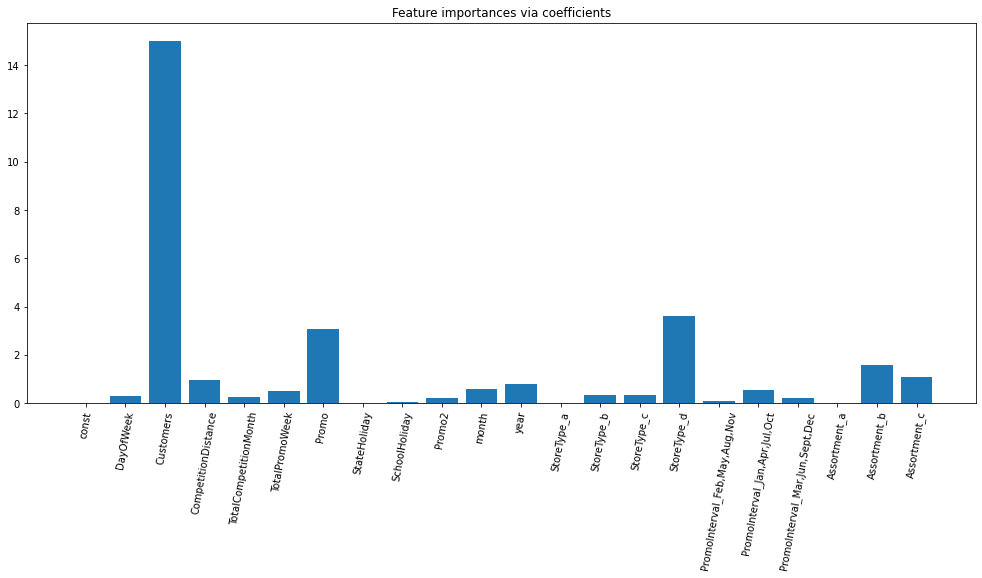

In [ ]:
plt.subplots(figsize=(17,7))
lasso = LassoCV()
lasso.fit(X_LR,y_lr)
importance = np.abs(lasso.coef_)
feature_names = X_LR.columns
plt.bar(height=importance, x=feature_names)
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

# **Linear Regression**

In [ ]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [ ]:
# Splitting X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X_LR, y_lr, test_size=0.25 , random_state=1)

In [ ]:
# invoking the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# intercept
regression_model.intercept_

81.21298060071085

In [ ]:
# coefficient
regression_model.coef_

array([ 0.00000000e+00,  3.03692326e-01,  1.50505295e+01,  9.44743591e-01,
        2.89770068e-01,  6.11670349e+02,  3.07504659e+00, -2.25886441e-02,
        7.61038961e-02,  3.27771657e+13,  4.47345044e-01,  3.85533162e-01,
        2.46674768e+13,  6.51453115e+12,  1.68672614e+13,  2.28429804e+13,
       -2.10372894e+13, -2.96799710e+13, -1.93046054e+13, -2.52676103e+13,
       -4.97579317e+12, -2.52356192e+13])

In [ ]:
# Predicting the Test set results
LR_test_pred = regression_model.predict(X_test)

In [ ]:
# MSE
mean_squared_error(y_test,LR_test_pred)

50.918723657872384

In [ ]:
# Train performance
import math
math.sqrt(mean_squared_error(y_train, regression_model.predict(X_train)))

7.138423606671389

In [ ]:
regression_model.score(X_train, y_train)

0.8194448552419713

In [ ]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.8195190895742936

As we can observe that the model score for both testing set as well as training set is very close, thus we can conclude that out data is **not overfit**. <BR>
And we are good to go ahead with this.

In [ ]:
# RMSE
import math
math.sqrt(mean_squared_error(y_test,regression_model.predict(X_test)))

7.135735677410731

In [ ]:
# R-sqaured for Train
r2_score(y_train, regression_model.predict(X_train))

0.8194448552419713

In [ ]:
# R-sqaured for Test
r2_score(y_test, LR_test_pred)

0.8195190895742936

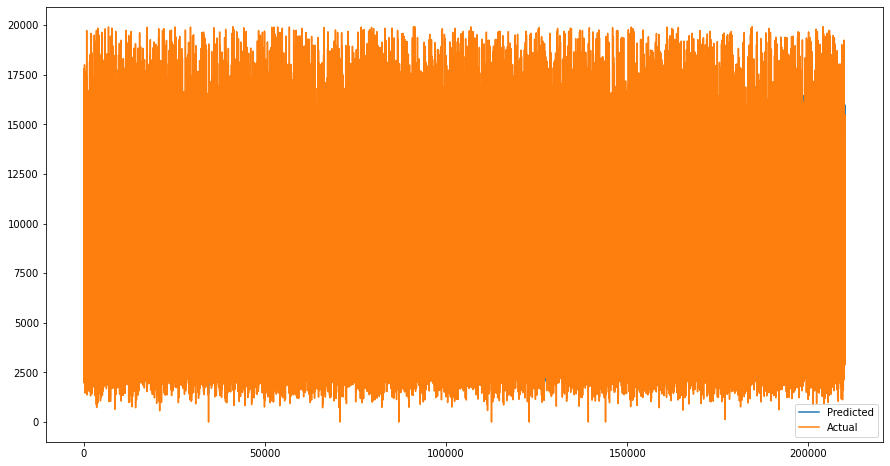

In [ ]:
# Ploting Expection vs Actual value
plt.figure(figsize=(15,8))
plt.plot(LR_test_pred**2)
plt.plot(np.array(y_test**2))
plt.legend(["Predicted","Actual"])
plt.show()

We are done with Linear Regression model and our model is not a overfit. Adjusted R square for our model comes around 82%.

In [ ]:
# Import linear models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Create lasso and ridge objects
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()
# Fit the models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
# Print scores, MSE, and coefficients
print("lasso score:", lasso.score(X_train, y_train))
print("ridge score:",ridge.score(X_train, y_train))
print("lasso MSE:", mean_squared_error(y_test, lasso.predict(X_test)))
print("ridge MSE:", mean_squared_error(y_test, ridge.predict(X_test)))
print("lasso coef:", lasso.coef_)
print("ridge coef:", ridge.coef_)

lasso score: 0.7888515104108281
ridge score: 0.8187486126519261
lasso MSE: 59.365647331388146
ridge MSE: 51.091509147602004
lasso coef: [ 0.          0.         13.25918751  0.          0.         -0.
  2.61997746 -0.          0.          0.          0.          0.
 -0.         -0.         -0.          2.60903285  0.          0.
 -0.         -0.         -0.65757027  0.50450321]
ridge coef: [ 0.00000000e+00  3.14458242e-01  1.50478629e+01  9.68735638e-01
  2.86588305e-01  1.77507980e+02  3.06928440e+00 -1.85542017e-02
  7.81737133e-02  1.09286644e+02  5.50085342e-01  6.92392655e-01
 -1.23653631e+00 -6.98231294e-01 -1.22696006e+00  2.44041431e+00
  4.43461470e+01  6.29664847e+01  4.04224906e+01 -3.93187059e-01
 -1.65248006e+00  7.19510633e-01]


Now we will try to implement other techniques available with us.

# Decision Tree

In [ ]:
# Importing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DT_df = data1.copy()

In [ ]:
X_DT = DT_df[features]
y_dt =DT_df['Sales']

In [ ]:
# using test train split
# splitting into 75% training and 25% test data
X_train, X_test, y_train, y_test = train_test_split(X_DT, y_dt, test_size=0.25, random_state=0)

In [ ]:
# creating model and fitting into it
reg = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=15, random_state=0)
reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=15,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
# predicted value of Sales
y_predicted = reg.predict(X_test)

In [ ]:
y_predicted[:5]

array([10030.90610115,  3278.20897876,  5441.95748869,  5441.95748869,
        7556.66907407])

In [ ]:
y_test[:5]

635507    8507
717377    1573
357975    5157
644361    4706
368029    6986
Name: Sales, dtype: int64

Visualization of Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

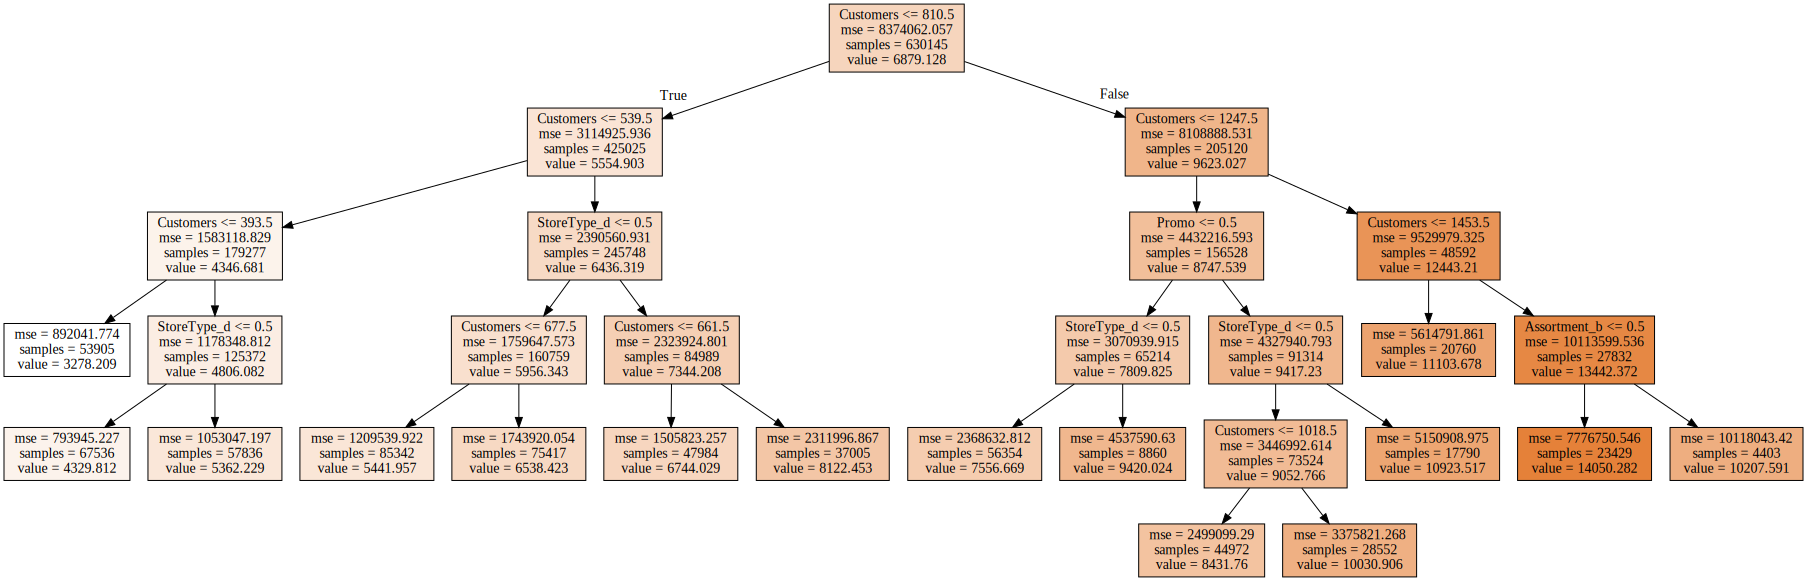

In [ ]:
graph = Source(tree.export_graphviz(reg, out_file=None
   , feature_names=X_train.columns,filled= True))
display(SVG(graph.pipe(format='svg')))

**Evaluation of Decision Tree Regression**

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
#r2 train
rt2=r2_score(y_train, reg.predict(X_train))
rt2

0.7398883957952158

In [ ]:
#r2 test
r2=r2_score(y_test, y_predicted)
print(r2)

0.7393380974202939


In [ ]:
# mse scores
mse=mean_squared_error(y_test, y_predicted)
print(mse)

2176281.794844835


In [ ]:
# rmse scores
rmse=(mean_squared_error(y_test, y_predicted))**0.5
print(rmse)

1475.2226255195637


In [ ]:
#mae
mean_absolute_error (y_test,y_predicted)

1104.606900484201

In [ ]:
#Adjusted R2 train
ntr=len(X_train)
ptr=len(X_train.columns)
adj_rt2 = 1-(1-rt2)*(ntr-1)/(ntr-ptr-1)
print(adj_rt2,ntr,ptr)

0.7398797271008684 630145 21


In [ ]:
#Adjusted R2 test
n=len(X_test)
p=len(X_test.columns)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2,n,p)

0.7393120345809724 210049 21


In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score

print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))

Accuracy of Train Data : [0.73927061 0.73791512 0.73906768 0.74120481 0.74189759 0.73852358
 0.73582513 0.74225754 0.7411821  0.73775882]
Accuracy of Test Data : [0.74103483 0.74016078 0.74259906 0.73802583 0.73229156 0.73797626
 0.74237404 0.73983909 0.74072722 0.73502328]


By looking at the values above we can see that there is not much variation between various sets. <BR>
We have not received very good scores in this set. Adjusted R2 is 0.73684<BR>
So, we will try with Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [ ]:
X_RF = data1[features]
y_rf = data1['Sales']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X_RF, y_rf, test_size = 0.2, random_state = 0)

In [ ]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(672155, 21)

 The shape of test dataset :
(168039, 21)


In [ ]:
# Scorers
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print ('MSE: %2.3f' % mse)
    return mse

def R2(y_true,y_pred):    
     r2 = r2_score(y_true, y_pred)
     print ('R2: %2.3f' % r2)
     return r2

def two_score(y_true,y_pred):    
    MSE(y_true,y_pred) #set score here and not below if using MSE in GridCV
    score = R2(y_true,y_pred)
    return score

def two_scorer():
    return make_scorer(two_score, greater_is_better=True) # change for false if using MSE

In [ ]:
# Hyperparameter tuning

# random_forest_model = RandomForestRegressor() 
# grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
# random_forest_model = GridSearchCV(random_forest_model, param_grid = grid_values, scoring = two_scorer(), cv=5)

# Fit the object to train dataset
# random_forest_model.fit(X_train, Y_train)

In [ ]:
# Hyperparameter tuning

# random_forest_model = RandomForestRegressor() 
# grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[10, 15, 20]}
# random_forest_model = GridSearchCV(random_forest_model, param_grid = grid_values, scoring = two_scorer(), cv=5)

# Fit the object to train dataset
# random_forest_model.fit(X_train, Y_train)

In [ ]:
# Hyperparameter tuning

random_forest_model = RandomForestRegressor() 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[5, 7, 10]}
random_forest_model = GridSearchCV(random_forest_model, param_grid = grid_values, scoring = two_scorer(), cv=3)

# Fit the object to train dataset
random_forest_model.fit(X_train, Y_train)

MSE: 1763757.311
R2: 0.788
MSE: 1765688.887
R2: 0.790
MSE: 1786852.736
R2: 0.788
MSE: 1761215.831
R2: 0.788
MSE: 1767514.974
R2: 0.789
MSE: 1792185.110
R2: 0.787
MSE: 1761261.414
R2: 0.788
MSE: 1765581.007
R2: 0.790
MSE: 1788960.834
R2: 0.788
MSE: 1406055.767
R2: 0.831
MSE: 1403829.077
R2: 0.833
MSE: 1419266.770
R2: 0.831
MSE: 1409113.422
R2: 0.830
MSE: 1410047.157
R2: 0.832
MSE: 1420772.226
R2: 0.831
MSE: 1404869.170
R2: 0.831
MSE: 1405426.312
R2: 0.832
MSE: 1424710.209
R2: 0.831
MSE: 1030782.041
R2: 0.876
MSE: 1043464.381
R2: 0.876
MSE: 1051229.464
R2: 0.875
MSE: 1030756.543
R2: 0.876
MSE: 1039963.395
R2: 0.876
MSE: 1045838.877
R2: 0.876
MSE: 1029996.081
R2: 0.876
MSE: 1042444.351
R2: 0.876
MSE: 1044601.679
R2: 0.876


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
Random_Forest_optimal_model = random_forest_model.best_estimator_
Random_Forest_optimal_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
random_forest_model.best_params_

{'max_depth': 10, 'n_estimators': 80}

In [ ]:
random_forest_model.best_score_

0.8759011086984221

Predicting the train and test dataset using the best fitted model

In [ ]:
rf_train_preds =  Random_Forest_optimal_model.predict(X_train)
rf_test_preds  = Random_Forest_optimal_model.predict(X_test)

In [ ]:
# MSE - Test 
mean_squared_error(Y_test,rf_test_preds)

1043231.0647101948

In [ ]:
# RMSE - Test
import math
math.sqrt(mean_squared_error(Y_test,rf_test_preds))

1021.3868340203895

In [ ]:
# R-sqaured for Train
r2_score(Y_train, rf_train_preds)

0.8770829380997925

In [ ]:
# R-sqaured for Test
r2_score(Y_test, rf_test_preds)

0.8751248096716533

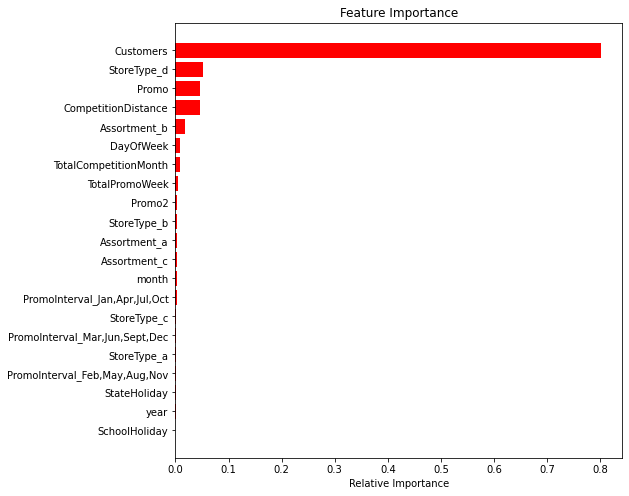

In [ ]:
# Plotting Variable Importance
features = X_train.columns
importances = random_forest_model.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

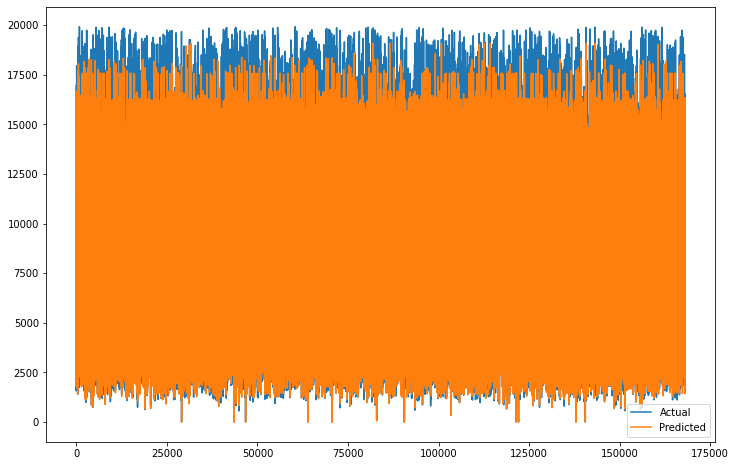

In [ ]:
# Prediction vs test
plt.figure(figsize=(12,8))
plt.plot(np.array(Y_test))
plt.plot(rf_test_preds)
plt.legend(["Actual","Predicted"])
plt.show()

Few conclusion that we can make from Random Forest:


*   Optimal score is close to 0.87569
*   R square score of train data is 0.87730 and for the test data is 0.874126
* Both the scores are close enough indicating that our model is good and there is no overfitting or underfitting observed in the model



# Light GBM

In [ ]:
import lightgbm as lgb

In [ ]:
# Maximum depth of trees
max_depth = [8, 10]

# bagging fraction
bagging_fraction = [0.5, 0.6,0.7]

#max-bin
max_bin = [400, 500, 600]

# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'bagging_fraction':bagging_fraction, 'max_bin': max_bin}

param_dict

{'bagging_fraction': [0.5, 0.6, 0.7],
 'max_bin': [400, 500, 600],
 'max_depth': [8, 10]}

In [ ]:
# Creating Model of the LGBRegressor
LGB_model = lgb.LGBMRegressor()

# Grid search
LGB_grid = GridSearchCV(estimator = LGB_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring = 'r2')

LGB_grid.fit(X_train,Y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] bagging_fraction=0.5, max_bin=400, max_depth=8 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... bagging_fraction=0.5, max_bin=400, max_depth=8, total=   6.0s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=8 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV] ... bagging_fraction=0.5, max_bin=400, max_depth=8, total=   5.9s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=8 ..................
[CV] ... bagging_fraction=0.5, max_bin=400, max_depth=8, total=   6.0s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=10 .................
[CV] .. bagging_fraction=0.5, max_bin=400, max_depth=10, total=   5.9s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=10 .................
[CV] .. bagging_fraction=0.5, max_bin=400, max_depth=10, total=   5.9s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=10 .................
[CV] .. bagging_fraction=0.5, max_bin=400, max_depth=10, total=   5.9s
[CV] bagging_fraction=0.5, max_bin=500, max_depth=8 ..................
[CV] ... bagging_fraction=0.5, max_bin=500, max_depth=8, total=   6.0s
[CV] bagging_fraction=0.5, max_bin=500, max_depth=8 ..................
[CV] ... bagging_fraction=0.5, max_bin=500, max_depth=8, total=   5.9s
[CV] bagging_fraction=0.5, max_bin=500, max_depth=8 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  5.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bagging_fraction': [0.5, 0.6, 0.7],
                         'max_bin': [400, 500, 600], 'max_depth': [8, 10]},
             pre_dispatch='2*n_jobs', refi

In [ ]:
LGB_grid.best_score_

0.9085897647935558

In [ ]:
optimal_model = LGB_grid.best_estimator_
optimal_model

LGBMRegressor(bagging_fraction=0.5, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
              max_bin=600, max_depth=10, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=31, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [ ]:
LGB_grid.best_params_

{'bagging_fraction': 0.5, 'max_bin': 600, 'max_depth': 10}

In [ ]:
# Prediction for train dataset
y_pred_train_LGB = optimal_model.predict(X_train) 
# Predictionfor test dataset  
y_pred_test_LGB = optimal_model.predict(X_test)     

In [ ]:
# MSE - Test 
mean_squared_error(Y_test,y_pred_test_LGB)

764043.853954782

In [ ]:
# RMSE - Test
math.sqrt(mean_squared_error(Y_test,y_pred_test_LGB))

874.0960210153013

In [ ]:
# R-sqaured for Train
r2_score(Y_train, y_pred_train_LGB)

0.9095843102753219

In [ ]:
# R-sqaured for Test
r2_score(Y_test, y_pred_test_LGB)

0.9085436343785339

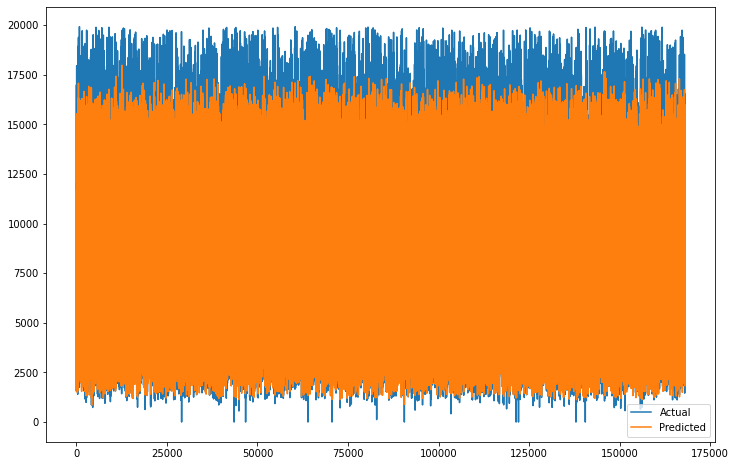

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(np.array(Y_test))
plt.plot(y_pred_test_LGB)
plt.legend(["Actual","Predicted"])
plt.show()

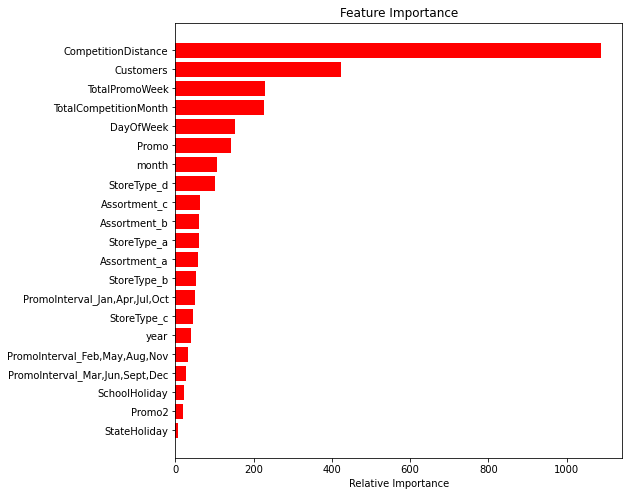

In [ ]:
# Plotting Variable Importance
features = X_train.columns
importances = LGB_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Stacking

In [ ]:
## stacking

In [ ]:
!pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19878 sha256=7cf4dde07f19e717ba342e752c64a6b331652a718e668527b3a4f636d6d66ec7
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor 
from xgboost import XGBRegressor 
from vecstack import stacking

In [ ]:
models = [
    lgb.LGBMRegressor(bagging_fraction = 0.5, max_bin = 600, max_depth = 10),
        
    RandomForestRegressor(random_state=0, n_estimators=80, max_depth=10),
        
    DecisionTreeRegressor(max_depth=10, criterion = 'mse'),
]

In [ ]:
S_train, S_test = stacking(models,                   
                           X_train, Y_train, X_test,   
                           regression=True, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=r2_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

/usr/local/lib/python3.7/dist-packages/vecstack/core.py:461: UserWarning: This is regression task hence classification-specific parameters set to <True> were ignored: <stratified>
  warnings.warn(warn_str, UserWarning)


task:         [regression]
metric:       [r2_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LGBMRegressor]
    fold  0:  [0.90902727]
    fold  1:  [0.90708683]
    fold  2:  [0.90966244]
    fold  3:  [0.90767196]
    fold  4:  [0.90906191]
    ----
    MEAN:     [0.90850208] + [0.00096205]
    FULL:     [0.90850343]

model  1:     [RandomForestRegressor]
    fold  0:  [0.87571900]
    fold  1:  [0.87462389]
    fold  2:  [0.87534285]
    fold  3:  [0.87579096]
    fold  4:  [0.87569292]
    ----
    MEAN:     [0.87543392] + [0.00043365]
    FULL:     [0.87543500]

model  2:     [DecisionTreeRegressor]
    fold  0:  [0.86489073]
    fold  1:  [0.86369934]
    fold  2:  [0.86524059]
    fold  3:  [0.86479291]
    fold  4:  [0.86419630]
    ----
    MEAN:     [0.86456397] + [0.00054768]
    FULL:     [0.86456462]



In [ ]:
# Second Level
model = XGBRegressor(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model = model.fit(S_train, Y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % r2_score(Y_test, y_pred))

[16:02:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Final prediction score: [0.91313285]


In [ ]:
y_train_pred = model.predict(S_train)

In [ ]:
# R-sqaured for Train
r2_score(Y_train, y_train_pred)

0.9131502612456375

In [ ]:
# R-sqaured for Test
r2_score(Y_test, y_pred)

0.9131328532866343

In [ ]:
# MSE Test
mean_squared_error(Y_train,y_train_pred)

727039.3818396734

In [ ]:
# RMSE Test
math.sqrt(mean_squared_error(Y_train,y_train_pred))

852.6660435596538

As we can observe that r2 score of both test data and training date is close to same, hence we can conclude that our data is neither overfit nor underfit

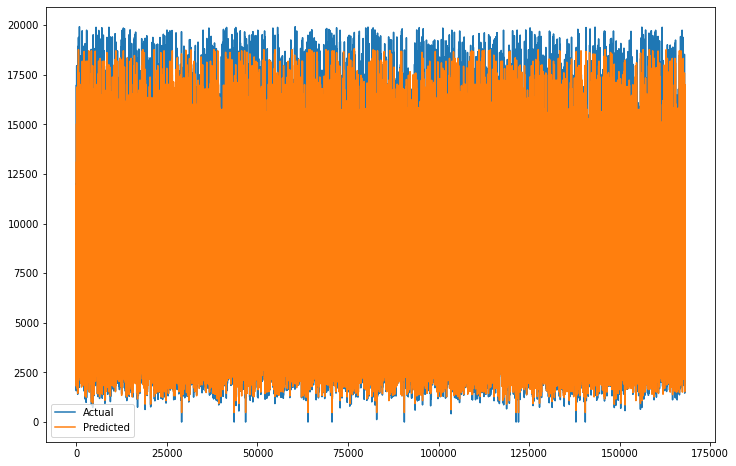

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(np.array(Y_test))
plt.plot(y_pred)
plt.legend(["Actual","Predicted"])
plt.show()

# Conclusions
We can conclude from the above model that all of them provided very good results to us and along with that all of them were best fit. No over-fitting or under-fitting was observeModel score of Light GBM and Stacking was very close. <BR>
We can select any of the two models as score of stacking was bit better than Light GBM, however, Light GBM was comparitively more efficient in terms of power and computer efficiency when compared with Light GBM.

In [ ]:
ols_df = pd.DataFrame({"Model":["OLS"],"R-square":[0.819],"Adjusted R-square":[0.819]}).set_index("Model")
ols_df

,R-square,Adjusted R-square
Model,,
OLS,0.819,0.819


In [ ]:
model_df = pd.DataFrame({"Model":["Linear Regression","Decision Tree","Random Forest","Light GBM","Stacking"],
                         "Train R-square":[0.80106,0.73987,0.87708,0.90958,0.91315],
                         "Test R-square":[0.80080,0.739312,0.87512,0.90854,0.91312]}).set_index("Model")
model_df

,Train R-square,Test R-square
Model,,
Linear Regression,0.80106,0.800800
Decision Tree,0.73987,0.739312
Random Forest,0.87708,0.875120
Light GBM,0.90958,0.908540
Stacking,0.91315,0.913120
